In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [25]:
df = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
df

,A,B,C
0,-1.678710,-1.932680,0.507932
1,1.917689,1.175643,-0.325784
2,0.443787,-1.203074,1.386827
3,-0.089266,0.572674,-0.244377
4,0.392955,-2.415141,1.213533


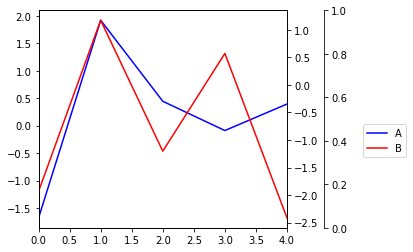

In [26]:
df = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df.A.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
df.B.plot(ax=ax, style='r-', secondary_y=True)

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0],
            ax.right_ax.get_lines()[0]],\
           ['A','B'], bbox_to_anchor=(1.5, 0.5))

In [30]:
df1 = pd.DataFrame(index = [1,2,3,4])
df2 = pd.DataFrame(index = [1,2,3,4])
df1['A'] = [1,2,3,4]
df1['B'] = [2,3,4,5]
df2['A'] = [1,2,3,4]
df2['B'] = [2,3,4,5]
print(df1)
print(df2)
df1==df2

   A  B
1  1  2
2  2  3
3  3  4
4  4  5
   A  B
1  1  2
2  2  3
3  3  4
4  4  5


,A,B
1,True,True
2,True,True
3,True,True
4,True,True


In [41]:
from pandas.util.testing import assert_frame_equal
assert_frame_equal(df1, df2, check_dtype=True)